## Study of coverage
Analysis the result from the different sources and compare them together

In [1]:
import pandas as pd
import numpy as np
from itertools import product
import random
import matplotlib.pyplot as plt
import random
random.seed(1907)
np.random.seed(1907)

def compute_combination(row):
    combination = np.array([row[i] for i in range(df.shape[1]-2)])
    return possibleCombination_code[str(combination)]

df = pd.read_csv("../processed_csv/coverage.csv",index_col=0)

possibleCombination = sorted(np.array([ele for ele in product([True,False], repeat = df.shape[1]-2)]),key=sum)
possibleCombination_code = {str(e):i for i,e in enumerate(possibleCombination)}

df["combination"] =df.apply(compute_combination,axis=1)

df = df.sort_values('combination',ascending=False)

def color_background(row):
    return [
        'background-color: green; color: green' if cell == True
        else 'background-color: red; color: red'
        for cell in row
    ]
df_html = df.iloc[:,:df.shape[1]-1].style.apply(color_background,subset=df.columns[0:-2])
df_html.to_html("../res/coverage.html",col_space='100px',)

In [2]:
print(list(df.columns[0:-2]))
possibleCombination_code

['poci', 'openalex', 'dimensions', 'coci', 'venue']


{'[False False False False]': 0,
 '[ True False False False]': 1,
 '[False  True False False]': 2,
 '[False False  True False]': 3,
 '[False False False  True]': 4,
 '[ True  True False False]': 5,
 '[ True False  True False]': 6,
 '[ True False False  True]': 7,
 '[False  True  True False]': 8,
 '[False  True False  True]': 9,
 '[False False  True  True]': 10,
 '[ True  True  True False]': 11,
 '[ True  True False  True]': 12,
 '[ True False  True  True]': 13,
 '[False  True  True  True]': 14,
 '[ True  True  True  True]': 15}

Text(0.5, 1.0, 'Count of combinations by venue')

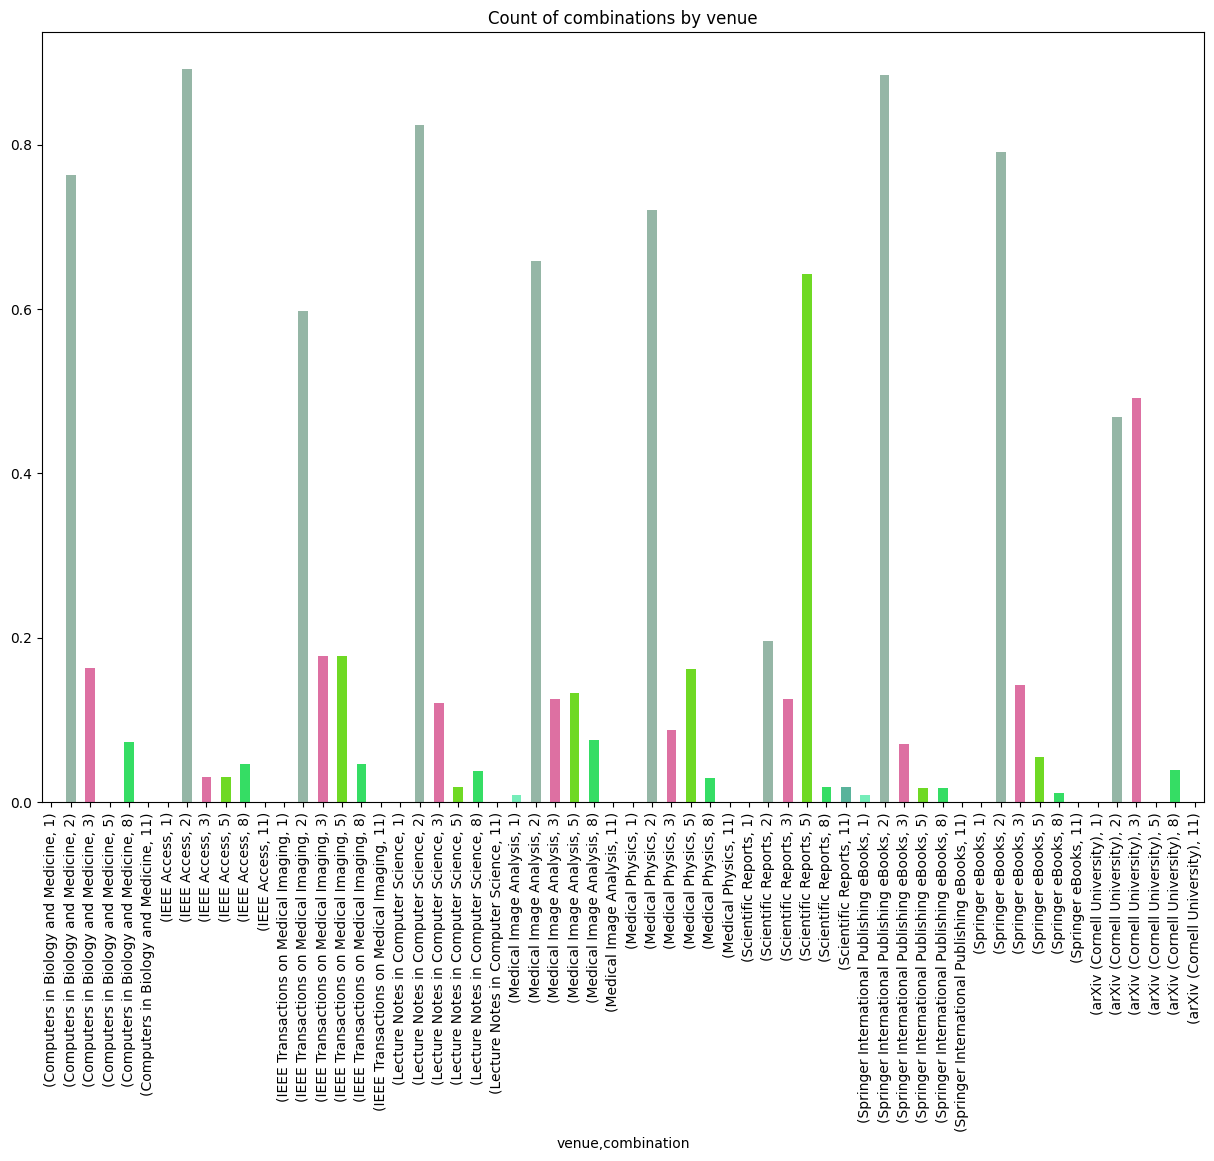

In [3]:
n = 10

number_of_colors = df['combination'].nunique()

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

df_plot = df[df['venue'].isin(df['venue'].value_counts()[:n].index.tolist())]
df_plot = df_plot.astype({"venue": str, "combination": int})
plt.figure(figsize=(15,10))

((df_plot.groupby(['venue','combination'])["poci"].count()/df_plot.groupby(['venue'])["poci"].count()).unstack(fill_value=0).stack()).plot.bar(color=color)
plt.title("Count of combinations by venue")

Text(0.5, 1.0, 'Count of combinations by year')

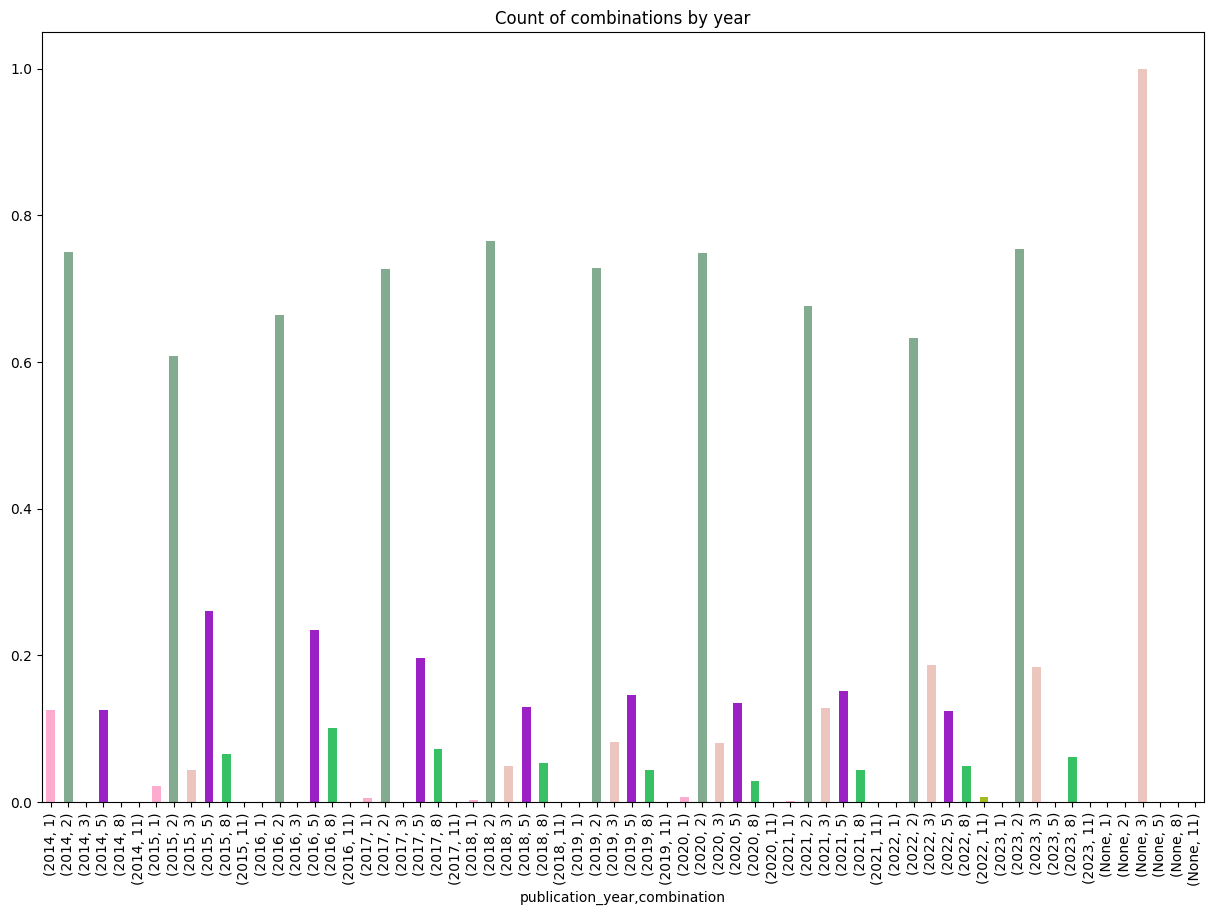

In [5]:
n = 10

number_of_colors = df['combination'].nunique()

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
df_plot = df[df["publication_year"] == df["publication_year"]]
df_plot = df.astype({"publication_year": str, "combination": int})
plt.figure(figsize=(15,10))

((df_plot.groupby(['publication_year','combination'])["poci"].count()/df_plot.groupby(['publication_year'])["poci"].count()).unstack(fill_value=0).stack()).plot.bar(color=color)
plt.title("Count of combinations by year")